In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale = 2)

/tmp/ipykernel_20/3109881190.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
data1 = pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
data1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data1.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data1["Survived"].sum()

342

- The Age, Cabin and Embarked have null values. I will try to fix them

# How many Survived?

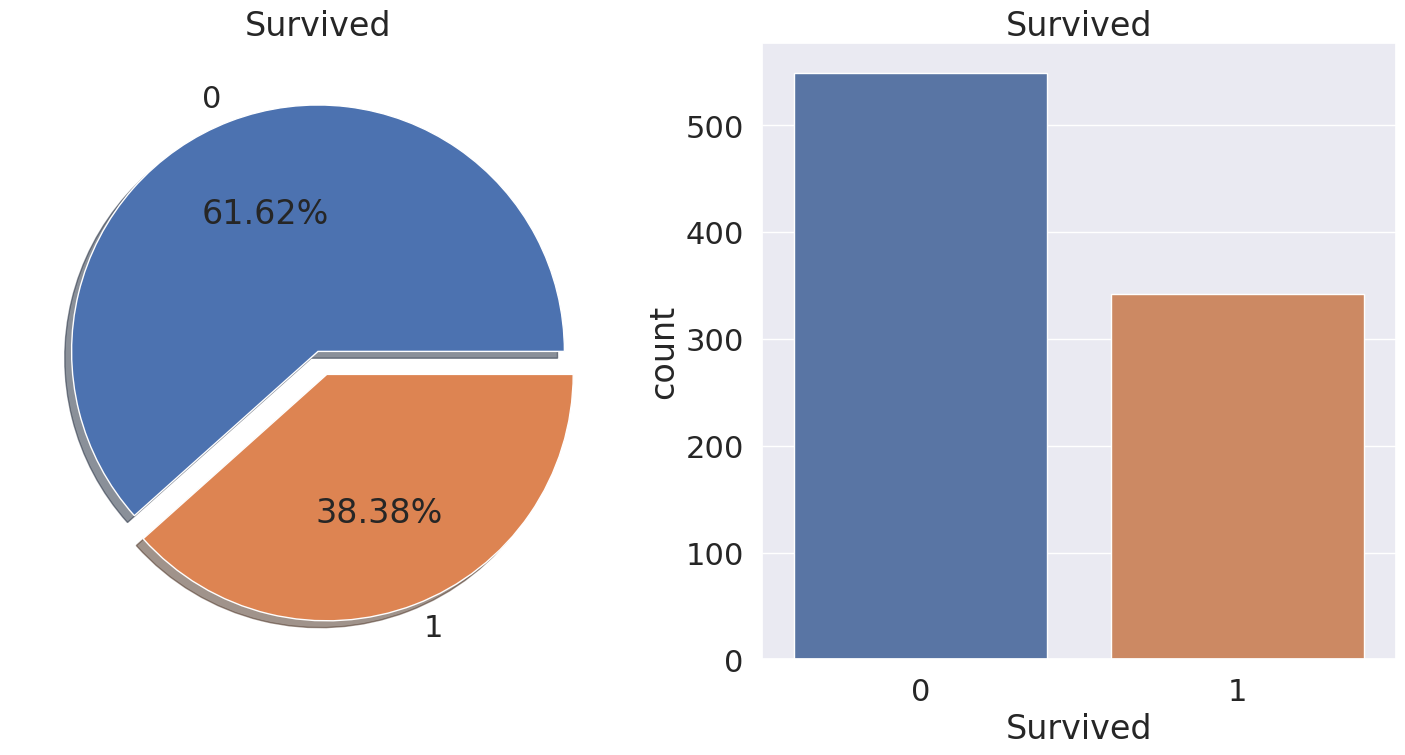

In [7]:

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Replace 'your_dataset' with the actual name of your dataset
data1['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x= 'Survived', data=data1, ax=ax[1])
ax[1].set_title('Survived')

plt.show()


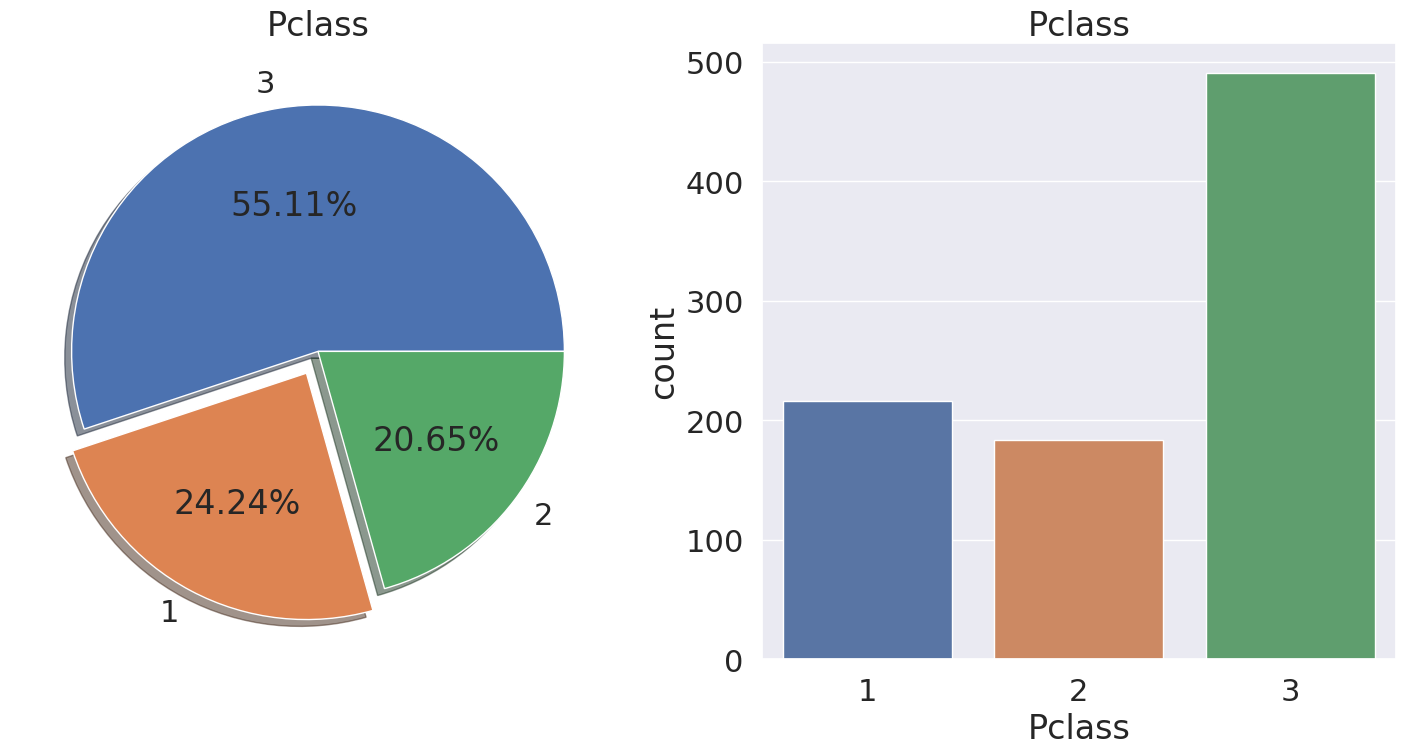

In [8]:

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Replace 'your_dataset' with the actual name of your dataset
data1['Pclass'].value_counts().plot.pie(explode=[0.0, 0.1, 0], autopct='%1.2f%%', ax=ax[0], shadow=True)

ax[0].set_title('Pclass')
ax[0].set_ylabel('')
sns.countplot(x='Pclass', data=data1, ax=ax[1])
ax[1].set_title('Pclass')

plt.show()


- It is eveident that not many passengers survived the accidents.
- Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the apssengers did survive and who didn't

- we will try to check the survival rate  by using the diffrent features of the dataset. 

- Some of the features being Sex, Port Of Embarcation, Age, etc. First let us Understand the different types of features




# Types Of Features

## Categorical features
- A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. 
- For example, gender is a categorical variable having two categories (male and female).
- Now we cannot sort or give any ordering to such variables They are also known as **Nominal Variables**

남여

## Ordinal Features:

- An ordinal variable is similar to categorical values.
- but the difference between them is that we can have relative ordering or sorting between the values.
- For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. 
- Here we can hava a relative so rt in the variable

**Ordinal Features in the dataset: Pclass**

## Continous Feature:
- A feature is said to be continous if it can take values between any two points or betwwen the minimum or maximum values in the features column

나이


# Analysing The Feature

## sex --> Categorical Feature

In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()

NameError: name 'data' is not defined

In [ ]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x= 'Sex', hue = 'Survived', data = data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- This looks interesting. The number of men on the ship is lot more than the number of women.
- Still the number of women saved is almost twice the number of males saved. - The survival rates for a women on the ship is around 75% while that for men in around 18-19%

- this looks to be a very important feature for modeling. But is it the best??
- Lets check other features

In [ ]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
# Calculate the count of survived passengers for each Pclass
survived_counts = data[data['Survived'] == 1].groupby('Pclass')['Survived'].count()

# Get the count of passengers in Pclass 3
total_count_pclass3 = data[data['Pclass'] == 3].shape[0]

# Calculate the survival rate for Pclass 3
survival_rate_pclass3 = survived_counts[3] / total_count_pclass3

# Print the survival rate
print("Survival rate for Pclass 3:", survival_rate_pclass3)


In [ ]:
f,ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00', '#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x= 'Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Deads')
plt.show()

- People say Money Can't Buy Everything. 
- But we can clearly see that Passengers Of Pclass 1 were given a very high priprity while rescue. Even though the the number of Passenger in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

- For Pclass 1% survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistc world.

- Lets Dive in little bit more and check the other interesting observations. Lets check survival rate with Sex and Pclass Together.